In [10]:
ls


'creditcard_2023[1].csv'   sample_data/


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot  as plt

In [12]:
df = pd.read_csv("creditcard_2023[1].csv").set_index("id")

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458867 entries, 0 to 458866
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      458867 non-null  float64
 1   V2      458867 non-null  float64
 2   V3      458867 non-null  float64
 3   V4      458867 non-null  float64
 4   V5      458867 non-null  float64
 5   V6      458867 non-null  float64
 6   V7      458867 non-null  float64
 7   V8      458867 non-null  float64
 8   V9      458867 non-null  float64
 9   V10     458867 non-null  float64
 10  V11     458867 non-null  float64
 11  V12     458867 non-null  float64
 12  V13     458867 non-null  float64
 13  V14     458867 non-null  float64
 14  V15     458867 non-null  float64
 15  V16     458866 non-null  float64
 16  V17     458866 non-null  float64
 17  V18     458866 non-null  float64
 18  V19     458866 non-null  float64
 19  V20     458866 non-null  float64
 20  V21     458866 non-null  float64
 21  V22     458866 

In [28]:
df.count()

,0
V1,458867
V2,458867
V3,458867
V4,458867
V5,458867
V6,458867
V7,458867
V8,458867
V9,458867
V10,458867


In [18]:
df.isna().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [19]:
df_cleaned = df.dropna()

<Axes: xlabel='class', ylabel='frequencey'>

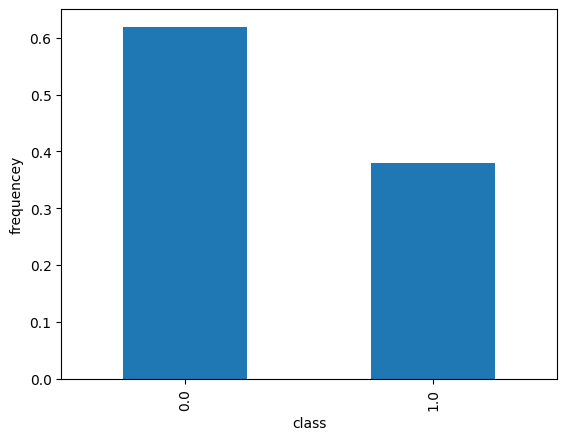

In [20]:
df_cleaned["Class"].value_counts(normalize=True).plot(kind="bar" ,ylabel="frequencey",  xlabel="class" )

In [21]:
target = "Class"
X = df_cleaned.drop(columns=target)
y = df_cleaned[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# First apply PCA without limiting n_components to inspect all
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Explained variance for all components
explained_variances = pca_full.explained_variance_ratio_
print("Explained variance ratio for all components:")
for i, var in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {var:.4f}")

# Automatically choose number of components to retain 95% variance
cumulative_variance = np.cumsum(explained_variances)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nTo capture at least 95% variance, take top {n_components_95} components.")

# Apply PCA using the optimal number of components
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Final confirmation of variance captured
final_captured_variance = pca.explained_variance_ratio_.sum()
print(f"Total variance captured by top {n_components_95} components: {final_captured_variance:.4f}")



Explained variance ratio for all components:
Principal Component 1: 0.3173
Principal Component 2: 0.0894
Principal Component 3: 0.0622
Principal Component 4: 0.0582
Principal Component 5: 0.0424
Principal Component 6: 0.0363
Principal Component 7: 0.0345
Principal Component 8: 0.0341
Principal Component 9: 0.0311
Principal Component 10: 0.0293
Principal Component 11: 0.0274
Principal Component 12: 0.0240
Principal Component 13: 0.0215
Principal Component 14: 0.0202
Principal Component 15: 0.0197
Principal Component 16: 0.0166
Principal Component 17: 0.0159
Principal Component 18: 0.0145
Principal Component 19: 0.0141
Principal Component 20: 0.0120
Principal Component 21: 0.0115
Principal Component 22: 0.0107
Principal Component 23: 0.0099
Principal Component 24: 0.0095
Principal Component 25: 0.0087
Principal Component 26: 0.0083
Principal Component 27: 0.0080
Principal Component 28: 0.0078
Principal Component 29: 0.0049

To capture at least 95% variance, take top 23 components.
Total 

In [27]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.6196


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:54:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix:
[[56837    28]
 [    0 34909]]


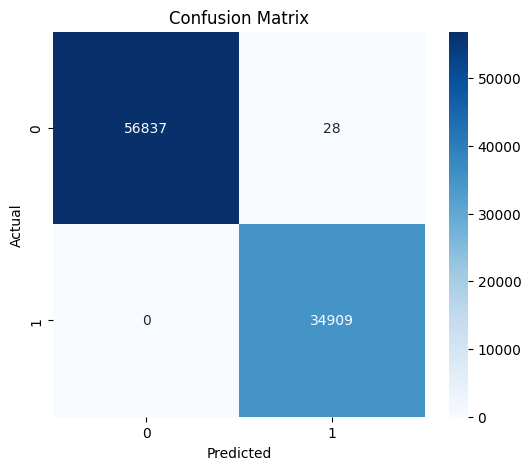


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56865
         1.0       1.00      1.00      1.00     34909

    accuracy                           1.00     91774
   macro avg       1.00      1.00      1.00     91774
weighted avg       1.00      1.00      1.00     91774



In [30]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train faster models with parallelism
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Use 30% of test data as validation set
X_val, _, y_val, _ = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

# Initial equal weights
w_rf, w_xgb = 0.5, 0.5

# EM-like loop with convergence check
for _ in range(10):
    p_rf = rf.predict_proba(X_val)
    p_xgb = xgb.predict_proba(X_val)

    loss_rf = log_loss(y_val, p_rf)
    loss_xgb = log_loss(y_val, p_xgb)

    inv_losses = np.exp(-np.array([loss_rf, loss_xgb]))
    new_weights = inv_losses / inv_losses.sum()

    # Early stopping if weights converge
    if np.allclose([w_rf, w_xgb], new_weights, atol=1e-3):
        break

    w_rf, w_xgb = new_weights
    print(f"Updated Weights → RF: {w_rf:.3f}, XGB: {w_xgb:.3f}")

# Final ensemble prediction
final_probs = w_rf * rf.predict_proba(X_test) + w_xgb * xgb.predict_proba(X_test)
final_preds = np.argmax(final_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, final_preds)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, final_preds))
